In [35]:
import pandas as pd
import numpy as np
import plotly.express as px

In [36]:
Gebaude_AM = ['hka-aqm-am001', 'hka-aqm-am002',
       'hka-aqm-am003a', 'hka-aqm-am003b', 'hka-aqm-am004',
       'hka-aqm-am005', 'hka-aqm-am107', 'hka-aqm-am109', 'hka-aqm-am110',
       'hka-aqm-am111', 'hka-aqm-am115', 'hka-aqm-am116', 'hka-aqm-am117',
       'hka-aqm-am123', 'hka-aqm-am124', 'hka-aqm-am126',
       'hka-aqm-am201a', 'hka-aqm-am201b', 'hka-aqm-am204',
       'hka-aqm-am205', 'hka-aqm-am209', 'hka-aqm-am210', 'hka-aqm-am211',
       'hka-aqm-am301', 'hka-aqm-am307', 'hka-aqm-am308']

In [37]:
df = pd.read_csv("aggregated_hourly.csv")
#df = pd.read_parquet("/Users/florian/Documents/github/study/IoT/IoT/main/output.parquet")

df = df.loc[~df['device_id'].isin(Gebaude_AM)]
df["date_time"] = pd.to_datetime(df["date_time"])
df.head()

,device_id,date_time,tmp,hum,snr,CO2,VOC,vis,IR,WIFI,...,spreading_factor,bandwidth,f_cnt,gateway_drag-lps8-01,gateway_drag-lps8-02,gateway_drag-lps8-03,gateway_drag-lps8-05,gateway_drag-lps8-07,gateway_drag-lps8-08,gateway_drag-outd-01
0,hka-aqm-a014,2022-10-10 14:00:00,23.902895,47.4050,8.678947,532,464,1596,331,2,...,7,125000,40,1,0,0,0,0,0,0
1,hka-aqm-a014,2022-10-10 15:00:00,24.793750,43.1975,8.662500,509,477,464,59,2,...,7,125000,50,1,0,0,0,0,0,0
2,hka-aqm-a014,2022-10-10 16:00:00,24.856000,44.1520,8.160000,477,535,397,42,2,...,7,125000,55,1,0,0,0,0,0,0
3,hka-aqm-a014,2022-10-10 17:00:00,24.860000,45.9825,8.200000,493,566,384,39,1,...,7,125000,59,1,0,0,0,0,0,0
4,hka-aqm-a014,2022-10-10 18:00:00,24.824000,48.7540,8.800000,512,744,384,37,2,...,7,125000,64,1,0,0,0,0,0,0


In [38]:
#Spaltenanzahl
df.shape

(41589, 24)

### Haben insgesamt 24 Spalten mit 41589 Zeilen

### Die Zeilen setzen sich aus den verschiedenen Stunden aus 10 Räumen zusammen

In [39]:
df.describe()

,date_time,tmp,hum,snr,CO2,VOC,vis,IR,WIFI,BLE,...,spreading_factor,bandwidth,f_cnt,gateway_drag-lps8-01,gateway_drag-lps8-02,gateway_drag-lps8-03,gateway_drag-lps8-05,gateway_drag-lps8-07,gateway_drag-lps8-08,gateway_drag-outd-01
count,41589,41589.000000,41589.000000,41589.000000,41589.000000,41589.000000,41589.000000,41589.000000,41589.000000,41589.000000,...,41589.000000,41589.0,41589.000000,41589.000000,41589.000000,41589.000000,41589.0,41589.000000,41589.000000,41589.000000
mean,2023-04-19 03:38:14.654836736,24.118534,38.112129,-2.144808,507.607324,1016.717906,220.932699,66.921373,3.067927,12.427349,...,7.793070,125000.0,10746.380870,0.128736,0.562168,0.000096,0.0,0.245810,0.316502,0.734281
min,2022-09-05 12:00:00,14.187500,14.070000,-20.300000,258.000000,450.000000,4.000000,0.000000,0.000000,0.000000,...,7.000000,125000.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2023-02-05 13:00:00,21.775000,30.632500,-6.500000,435.000000,722.000000,8.000000,2.000000,2.000000,1.000000,...,7.000000,125000.0,1870.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,2023-04-15 16:00:00,23.460000,37.125000,-2.557895,459.000000,873.000000,18.000000,4.000000,3.000000,6.000000,...,7.000000,125000.0,5942.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000
75%,2023-07-08 22:00:00,26.595000,45.300000,1.400000,508.000000,1157.000000,160.000000,43.000000,4.000000,16.000000,...,8.000000,125000.0,18360.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.000000
max,2023-10-01 23:00:00,150.146667,115.716667,11.575000,13523.000000,14913.000000,57194.000000,17152.000000,13.000000,134.000000,...,12.000000,125000.0,44671.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000
std,NaN,3.473707,10.043505,6.092828,191.860758,470.803609,1362.904881,404.588131,1.404635,17.420611,...,1.292687,0.0,10962.721068,0.334911,0.496126,0.009807,0.0,0.430572,0.465117,0.441721


### Wir besitzen temporäre Lücken in den Daten

In [40]:
px.scatter(df, x='date_time', y='tmp', color='device_id')

Diese Lücken bestehen als größere Lücken generel und auch zwischen einzelnen Räumen, siehe Vergleich Raum 017

In [41]:
df["number_days"] = 0
for i in df.device_id.unique():
    df.loc[df.device_id == i, "number_days"] = df
df["number_days"]

0        0
1        0
2        0
3        0
4        0
        ..
41584    0
41585    0
41586    0
41587    0
41588    0
Name: number_days, Length: 41589, dtype: int64

In [42]:
df["date"] = df["date_time"].dt.date
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date_time"].dt.year
df.dtypes

device_id                       object
date_time               datetime64[ns]
tmp                            float64
hum                            float64
snr                            float64
CO2                              int64
VOC                              int64
vis                              int64
IR                               int64
WIFI                             int64
BLE                              int64
rssi                             int64
channel_rssi                     int64
channel_index                    int64
spreading_factor                 int64
bandwidth                        int64
f_cnt                            int64
gateway_drag-lps8-01             int64
gateway_drag-lps8-02             int64
gateway_drag-lps8-03             int64
gateway_drag-lps8-05             int64
gateway_drag-lps8-07             int64
gateway_drag-lps8-08             int64
gateway_drag-outd-01             int64
number_days                      int64
date                    d

- Sunburst mit wie viel % an Tagen pro Raum 

In [43]:
df_daysmissing = df.groupby(["device_id","year"]).nunique()[["date"]].reset_index()
df_daysmissing["total_days_2022"] = (pd.to_datetime("2022-12-31") - df.date.min()).days
df_daysmissing["total_days_2023"] = (df.date.max() - pd.to_datetime("2023-01-01")).days
df_daysmissing["missing_days"] = 0
for i in df.year.unique():
    if i == 2022:
        df_daysmissing.loc[df_daysmissing.year == i, "missing_days"] = (df_daysmissing.total_days_2022 - df_daysmissing.date)/df_daysmissing.total_days_2022
    else:
        df_daysmissing.loc[df_daysmissing.year == i, "missing_days"] = (df_daysmissing.total_days_2023 - df_daysmissing.date)/df_daysmissing.total_days_2023
df_daysmissing

/var/folders/fm/5lbdpfj928d6sqhy_19cp6ww0000gn/T/ipykernel_70592/3208157335.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.75213675 0.37606838 0.75213675 0.75213675 0.75213675 0.74358974
 0.75213675 0.75213675]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



,device_id,year,date,total_days_2022,total_days_2023,missing_days
0,hka-aqm-a014,2022,29,117,273,0.752137
1,hka-aqm-a017,2022,73,117,273,0.376068
2,hka-aqm-a017,2023,216,117,273,0.208791
3,hka-aqm-a101,2022,29,117,273,0.752137
4,hka-aqm-a101,2023,205,117,273,0.249084
5,hka-aqm-a102,2023,44,117,273,0.838828
6,hka-aqm-a103,2022,29,117,273,0.752137
7,hka-aqm-a103,2023,204,117,273,0.252747
8,hka-aqm-a106,2022,29,117,273,0.752137
9,hka-aqm-a106,2023,204,117,273,0.252747


In [44]:
px.sunburst(df_daysmissing, path=['year', 'device_id'], values='missing_days')

Device Ids that only have values in one year

In [45]:
device_ids = df.groupby('device_id')['year'].nunique()
device_ids = device_ids[device_ids == 1].index.tolist()
device_ids

['hka-aqm-a014', 'hka-aqm-a102', 'hka-aqm-a111']

In [46]:
df

,device_id,date_time,tmp,hum,snr,CO2,VOC,vis,IR,WIFI,...,gateway_drag-lps8-01,gateway_drag-lps8-02,gateway_drag-lps8-03,gateway_drag-lps8-05,gateway_drag-lps8-07,gateway_drag-lps8-08,gateway_drag-outd-01,number_days,date,year
0,hka-aqm-a014,2022-10-10 14:00:00,23.902895,47.4050,8.678947,532,464,1596,331,2,...,1,0,0,0,0,0,0,0,2022-10-10,2022
1,hka-aqm-a014,2022-10-10 15:00:00,24.793750,43.1975,8.662500,509,477,464,59,2,...,1,0,0,0,0,0,0,0,2022-10-10,2022
2,hka-aqm-a014,2022-10-10 16:00:00,24.856000,44.1520,8.160000,477,535,397,42,2,...,1,0,0,0,0,0,0,0,2022-10-10,2022
3,hka-aqm-a014,2022-10-10 17:00:00,24.860000,45.9825,8.200000,493,566,384,39,1,...,1,0,0,0,0,0,0,0,2022-10-10,2022
4,hka-aqm-a014,2022-10-10 18:00:00,24.824000,48.7540,8.800000,512,744,384,37,2,...,1,0,0,0,0,0,0,0,2022-10-10,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41584,hka-aqm-a112,2023-10-01 19:00:00,23.985000,46.6850,-8.350000,468,980,10,3,2,...,0,1,0,0,0,0,1,0,2023-10-01,2023
41585,hka-aqm-a112,2023-10-01 20:00:00,23.790000,47.4650,-10.500000,471,1021,10,3,2,...,0,1,0,0,0,1,0,0,2023-10-01,2023
41586,hka-aqm-a112,2023-10-01 21:00:00,23.617500,48.3700,-8.100000,470,991,8,2,2,...,0,1,0,0,0,1,1,0,2023-10-01,2023
41587,hka-aqm-a112,2023-10-01 22:00:00,23.500000,48.9300,-14.450000,483,1048,7,2,2,...,0,1,0,0,0,0,0,0,2023-10-01,2023


- Bar chart mit wie viel Stunden am Tag wir im Durchschnitt pro Raum habe


In [47]:
df.dtypes

device_id                       object
date_time               datetime64[ns]
tmp                            float64
hum                            float64
snr                            float64
CO2                              int64
VOC                              int64
vis                              int64
IR                               int64
WIFI                             int64
BLE                              int64
rssi                             int64
channel_rssi                     int64
channel_index                    int64
spreading_factor                 int64
bandwidth                        int64
f_cnt                            int64
gateway_drag-lps8-01             int64
gateway_drag-lps8-02             int64
gateway_drag-lps8-03             int64
gateway_drag-lps8-05             int64
gateway_drag-lps8-07             int64
gateway_drag-lps8-08             int64
gateway_drag-outd-01             int64
number_days                      int64
date                    d

In [48]:
grouped_df = df.groupby(['device_id', 'date']).size().reset_index(name='hours_per_day')
average_hours_per_day = grouped_df.groupby('device_id')[['hours_per_day']].mean()

In [49]:
grouped_df

,device_id,date,hours_per_day
0,hka-aqm-a014,2022-10-10,10
1,hka-aqm-a014,2022-10-11,24
2,hka-aqm-a014,2022-10-12,24
3,hka-aqm-a014,2022-10-13,24
4,hka-aqm-a014,2022-10-14,24
...,...,...,...
1801,hka-aqm-a112,2023-09-27,24
1802,hka-aqm-a112,2023-09-28,24
1803,hka-aqm-a112,2023-09-29,24
1804,hka-aqm-a112,2023-09-30,24


In [50]:
px.scatter(grouped_df, x="date", y='hours_per_day',color='device_id')

Wir haben sehr viele Tage an denen nicht alle 24h als Informationen gegeben sind.

In [51]:
px.bar(average_hours_per_day, x=average_hours_per_day.index, y='hours_per_day')

Der niedrigste Wert der durchschnittlichen täglichen Stunden ist in Raum 107

- Funny min und max Werte aufzeigen

In [52]:
df.describe().iloc[:,:-14]

,date_time,tmp,hum,snr,CO2,VOC,vis,IR,WIFI,BLE,rssi,channel_rssi
count,41589,41589.000000,41589.000000,41589.000000,41589.000000,41589.000000,41589.000000,41589.000000,41589.000000,41589.000000,41589.000000,41589.000000
mean,2023-04-19 03:38:14.654836736,24.118534,38.112129,-2.144808,507.607324,1016.717906,220.932699,66.921373,3.067927,12.427349,-107.439972,-107.439972
min,2022-09-05 12:00:00,14.187500,14.070000,-20.300000,258.000000,450.000000,4.000000,0.000000,0.000000,0.000000,-138.000000,-138.000000
25%,2023-02-05 13:00:00,21.775000,30.632500,-6.500000,435.000000,722.000000,8.000000,2.000000,2.000000,1.000000,-120.000000,-120.000000
50%,2023-04-15 16:00:00,23.460000,37.125000,-2.557895,459.000000,873.000000,18.000000,4.000000,3.000000,6.000000,-113.000000,-113.000000
75%,2023-07-08 22:00:00,26.595000,45.300000,1.400000,508.000000,1157.000000,160.000000,43.000000,4.000000,16.000000,-107.000000,-107.000000
max,2023-10-01 23:00:00,150.146667,115.716667,11.575000,13523.000000,14913.000000,57194.000000,17152.000000,13.000000,134.000000,-38.000000,-38.000000
std,NaN,3.473707,10.043505,6.092828,191.860758,470.803609,1362.904881,404.588131,1.404635,17.420611,20.634455,20.634455


### Funny temp

In [53]:
df.loc[df.tmp>40]

,device_id,date_time,tmp,hum,snr,CO2,VOC,vis,IR,WIFI,...,gateway_drag-lps8-01,gateway_drag-lps8-02,gateway_drag-lps8-03,gateway_drag-lps8-05,gateway_drag-lps8-07,gateway_drag-lps8-08,gateway_drag-outd-01,number_days,date,year
14310,hka-aqm-a103,2022-10-26 00:00:00,82.732778,112.333333,8.488889,13523,5025,1554,4,2,...,1,0,0,0,0,0,0,0,2022-10-26,2022
40588,hka-aqm-a112,2023-07-21 13:00:00,150.146667,115.716667,-4.833333,9660,14913,37132,17152,4,...,0,1,0,0,0,1,1,0,2023-07-21,2023


### Funny Hum

In [54]:
df.loc[df.hum > 100]

,device_id,date_time,tmp,hum,snr,CO2,VOC,vis,IR,WIFI,...,gateway_drag-lps8-01,gateway_drag-lps8-02,gateway_drag-lps8-03,gateway_drag-lps8-05,gateway_drag-lps8-07,gateway_drag-lps8-08,gateway_drag-outd-01,number_days,date,year
14310,hka-aqm-a103,2022-10-26 00:00:00,82.732778,112.333333,8.488889,13523,5025,1554,4,2,...,1,0,0,0,0,0,0,0,2022-10-26,2022
40588,hka-aqm-a112,2023-07-21 13:00:00,150.146667,115.716667,-4.833333,9660,14913,37132,17152,4,...,0,1,0,0,0,1,1,0,2023-07-21,2023


Wie sich zeigt sind dies gleichen Zeilen

### SNR

Wie wir sehen können liegt der Median bei -2.557895, wobei die 25% und 75% Quantile bei -6.500000 und 1.400000. 

In basic terms, SNR is the difference between the desired signal and the noise floor. Also, in terms of definition, the noise floor is the specious background transmissions that are produced by other devices or by devices that are unintentionally generating interference on a similar frequency.

* **5 dB bis 10 dB:** Signal Rausch Verhältnis ist zu gering für eine stabile Verbindung. Rauschen ist vom eigentlichen Signal kaum zu unterscheiden. 
* **10 dB bis 15 dB:** Gilt als minimal akzeptabler Wert für eine unzuverlässige Verbindung. 
* **15 dB bis 25 dB:** Ist die typischerweise minimal akzeptable Stufe für eine schlechte Verbindungsqualität.
* **25 dB bis 40 dB:** Gilt als gute Verbindungsqualität.
* **41 dB oder höher:** Gilt als ausgezeichnete Verbindungsqualität.

Wie in unserem Beispiel betrachtet werden kann haben wir sehr geringe SNR Werte, was dauraufhin deutet dass die Verbindung zu anderen Geräten sehr schlecht ist.

### RSSI

Das fast gleiche wie bei SNR stellen wir auch bei RSSI fest.

RSSI, or “Received Signal Strength Indicator,” is a measurement of how well your device can hear a signal from an access point or router.

| FM-RSSI | RSSI-Wert | Qualität |
|---|---|---|
| 40 bis 45 | -50 | Ausgezeichnet |
| 30 bis 39 | -60 | Sehr gut |
| 20 bis 29 | -70 | Gut |
| 10 bis 19 | -80 | Niedrig |
| 1 bis 9 | -90 | Sehr niedrig |
| 0 | 0 | Kein Signal |

Wie wir auch hier sehen haben wir im Durchschnitt Werte die uns sogar unter die Tabellenskala bringen

DUrchschnitt RSSI pro Raum

In [55]:
average_rssi = df.groupby('device_id')['rssi'].mean()
px.bar(average_rssi, x=average_rssi.index, y='rssi')

### CO2

The levels of CO2 in the air and potential health problems are: 400 ppm: average outdoor air level. 400–1,000 ppm: typical level found in occupied spaces with good air exchange. 1,000–2,000 ppm: level associated with complaints of drowsiness and poor air.

In [56]:
df.loc[df.CO2 > 1000].iloc[:,:-14]

,device_id,date_time,tmp,hum,snr,CO2,VOC,vis,IR,WIFI,BLE,rssi,channel_rssi
787,hka-aqm-a017,2022-10-26 11:00:00,24.090000,50.703333,-0.433333,1123,1378,104,22,4,14,-115,-115
788,hka-aqm-a017,2022-10-26 12:00:00,24.190000,51.326000,-3.460000,1125,1500,114,28,2,17,-115,-115
958,hka-aqm-a017,2022-11-02 14:00:00,23.890833,42.466667,1.258333,1031,1704,113,27,4,22,-111,-111
1293,hka-aqm-a017,2022-11-16 14:00:00,22.132000,48.058000,-1.280000,1012,1822,250,68,2,11,-115,-115
2080,hka-aqm-a017,2022-12-19 10:00:00,21.677500,23.701250,-1.887500,1020,1046,243,59,4,15,-108,-108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38379,hka-aqm-a112,2023-03-20 13:00:00,23.820270,37.429730,-0.516667,1003,1297,1155,410,6,31,-111,-111
38384,hka-aqm-a112,2023-03-20 18:00:00,23.322000,35.382000,0.860000,1013,1620,88,16,6,43,-109,-109
38431,hka-aqm-a112,2023-03-22 17:00:00,24.526667,38.811667,5.916667,1998,2391,349,117,3,23,-103,-103
38432,hka-aqm-a112,2023-03-22 18:00:00,24.130667,34.007333,3.213333,3111,2776,116,27,2,10,-103,-103


In [57]:
px.scatter(df.loc[df.CO2 > 1000], x='date_time', y='CO2', color='device_id')

Haben öfters Werte die über dem gewünschten Wertebereich liegen

### VOC

Volatile Organic Compounds (VOCs), sometimes known as chemical pollutants, are gases emitted by many of the goods we use to build and maintain our homes. Many of these pollutants are colorless and are odorless at low levels. They can be released into the environment during the use as well as storage of products. While products emit VOCs, the amount tends to decrease with age.

0 to 400 ppb: This is the acceptable level of VOC indoors. You should not expect short-term effects such as irritation or discomfort. 400 to 2,200 ppb: Short-term exposure can result in noticeable effects such as headaches, nausea, dizziness, and irritation of the respiratory tract and eyes.

In [58]:
df.loc[df.VOC > 1000].iloc[:,:-14]

,device_id,date_time,tmp,hum,snr,CO2,VOC,vis,IR,WIFI,BLE,rssi,channel_rssi
72,hka-aqm-a014,2022-10-13 14:00:00,23.586250,49.466250,8.3875,721,2059,180,45,3,12,-58,-58
73,hka-aqm-a014,2022-10-13 15:00:00,24.592500,47.015000,8.4500,562,1214,121,28,2,19,-60,-60
74,hka-aqm-a014,2022-10-13 16:00:00,24.822500,47.015000,8.9250,524,1261,113,25,3,19,-61,-61
75,hka-aqm-a014,2022-10-13 17:00:00,24.400000,48.297500,9.1750,476,1064,93,19,3,19,-65,-65
77,hka-aqm-a014,2022-10-13 19:00:00,23.761667,49.816667,8.7000,412,1415,59,8,3,19,-66,-66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41566,hka-aqm-a112,2023-10-01 01:00:00,23.242500,49.735000,-8.4750,500,1147,7,2,2,1,-112,-112
41567,hka-aqm-a112,2023-10-01 02:00:00,23.160000,49.357500,-9.0750,500,1075,7,1,2,1,-120,-120
41568,hka-aqm-a112,2023-10-01 03:00:00,23.067500,48.907500,-7.0750,502,1035,7,0,2,1,-111,-111
41585,hka-aqm-a112,2023-10-01 20:00:00,23.790000,47.465000,-10.5000,471,1021,10,3,2,2,-121,-121


In [59]:
px.scatter(df.loc[df.VOC > 1000], x='date_time', y='VOC', color='device_id')

### BLE

In [60]:
df.loc[df.BLE > 100].iloc[:,:-14]

,device_id,date_time,tmp,hum,snr,CO2,VOC,vis,IR,WIFI,BLE,rssi,channel_rssi
10422,hka-aqm-a101,2023-05-17 10:00:00,25.403333,33.480000,-3.100000,929,1391,55,8,8,117,-118,-118
10423,hka-aqm-a101,2023-05-17 11:00:00,25.780000,32.916667,-2.966667,1063,1576,58,11,8,117,-115,-115
10424,hka-aqm-a101,2023-05-17 12:00:00,25.250000,31.952500,-5.850000,805,1182,13,4,8,117,-117,-117
10425,hka-aqm-a101,2023-05-17 13:00:00,25.060000,32.172500,-1.750000,642,1068,48,9,8,117,-116,-116
10426,hka-aqm-a101,2023-05-17 14:00:00,25.180000,31.337500,-2.875000,606,998,50,7,8,117,-116,-116
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14688,hka-aqm-a103,2023-01-17 15:00:00,22.255000,35.800000,-1.350000,1901,2417,85,17,9,106,-112,-112
14903,hka-aqm-a103,2023-01-26 14:00:00,21.344000,33.072000,-1.520000,1652,2249,97,20,7,118,-111,-111
14904,hka-aqm-a103,2023-01-26 15:00:00,21.597500,34.482500,1.033333,1990,2470,84,16,7,120,-110,-110
14905,hka-aqm-a103,2023-01-26 16:00:00,21.532000,34.690000,-0.320000,2043,2557,79,12,7,120,-108,-108


einige Tage mit mehr als 100 Registrierten BLE Geräten in einem Raum

In [61]:
px.scatter(df.loc[df.BLE > 100], x='date_time', y='BLE', color='device_id')

Zeitlich passen alle Punkte entweder zu Semester Ende oder Anfang

Zu den Räumen muss gesagt werden:
* Raum 101 ist ein großer Hörsaal/Aula
* Raum 102 ist der Lernraum West/Ruhebereich
* Raum 103 ist die Bibliothek


### Korrelationsanalyse unseres Targets

In [62]:
df["shifted_Target"] = 0
for i in df.device_id.unique():
    df.loc[df.device_id == i, "shifted_Target"] = df.loc[df.device_id == i, "tmp"].shift(-1)
df.dropna(inplace=True)
df

/var/folders/fm/5lbdpfj928d6sqhy_19cp6ww0000gn/T/ipykernel_70592/2712882080.py:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[24.79375    24.856      24.86       24.824      24.71       24.49
 24.385      24.14       23.995      23.995      23.9875     23.95666667
 23.945      23.9425     23.925      23.928      23.95       23.8225
 23.74       23.7125     23.7025     23.85904762 23.942      23.9125
 23.9225     23.93       24.02       24.195      24.17       24.2425
 23.815      23.7425     23.76       23.78       23.775      23.75
 23.7575     23.7175     23.708      23.6625     23.57       23.5525
 23.64       23.94666667 24.5625     25.44974359 26.05492063 27.76375
 25.67       24.9175     24.6        24.66666667 24.82571429 24.8625
 24.54       24.42       24.345      24.2825     24.175      24.24
 24.1875     24.0425     24.01       23.9525     23.87       23.73
 23.7125     23.705      23.8725

,device_id,date_time,tmp,hum,snr,CO2,VOC,vis,IR,WIFI,...,gateway_drag-lps8-02,gateway_drag-lps8-03,gateway_drag-lps8-05,gateway_drag-lps8-07,gateway_drag-lps8-08,gateway_drag-outd-01,number_days,date,year,shifted_Target
0,hka-aqm-a014,2022-10-10 14:00:00,23.902895,47.4050,8.678947,532,464,1596,331,2,...,0,0,0,0,0,0,0,2022-10-10,2022,24.79375
1,hka-aqm-a014,2022-10-10 15:00:00,24.793750,43.1975,8.662500,509,477,464,59,2,...,0,0,0,0,0,0,0,2022-10-10,2022,24.85600
2,hka-aqm-a014,2022-10-10 16:00:00,24.856000,44.1520,8.160000,477,535,397,42,2,...,0,0,0,0,0,0,0,2022-10-10,2022,24.86000
3,hka-aqm-a014,2022-10-10 17:00:00,24.860000,45.9825,8.200000,493,566,384,39,1,...,0,0,0,0,0,0,0,2022-10-10,2022,24.82400
4,hka-aqm-a014,2022-10-10 18:00:00,24.824000,48.7540,8.800000,512,744,384,37,2,...,0,0,0,0,0,0,0,2022-10-10,2022,24.71000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41583,hka-aqm-a112,2023-10-01 18:00:00,24.227500,45.9900,-7.550000,469,981,62,26,2,...,1,0,0,0,1,0,0,2023-10-01,2023,23.98500
41584,hka-aqm-a112,2023-10-01 19:00:00,23.985000,46.6850,-8.350000,468,980,10,3,2,...,1,0,0,0,0,1,0,2023-10-01,2023,23.79000
41585,hka-aqm-a112,2023-10-01 20:00:00,23.790000,47.4650,-10.500000,471,1021,10,3,2,...,1,0,0,0,1,0,0,2023-10-01,2023,23.61750
41586,hka-aqm-a112,2023-10-01 21:00:00,23.617500,48.3700,-8.100000,470,991,8,2,2,...,1,0,0,0,1,1,0,2023-10-01,2023,23.50000


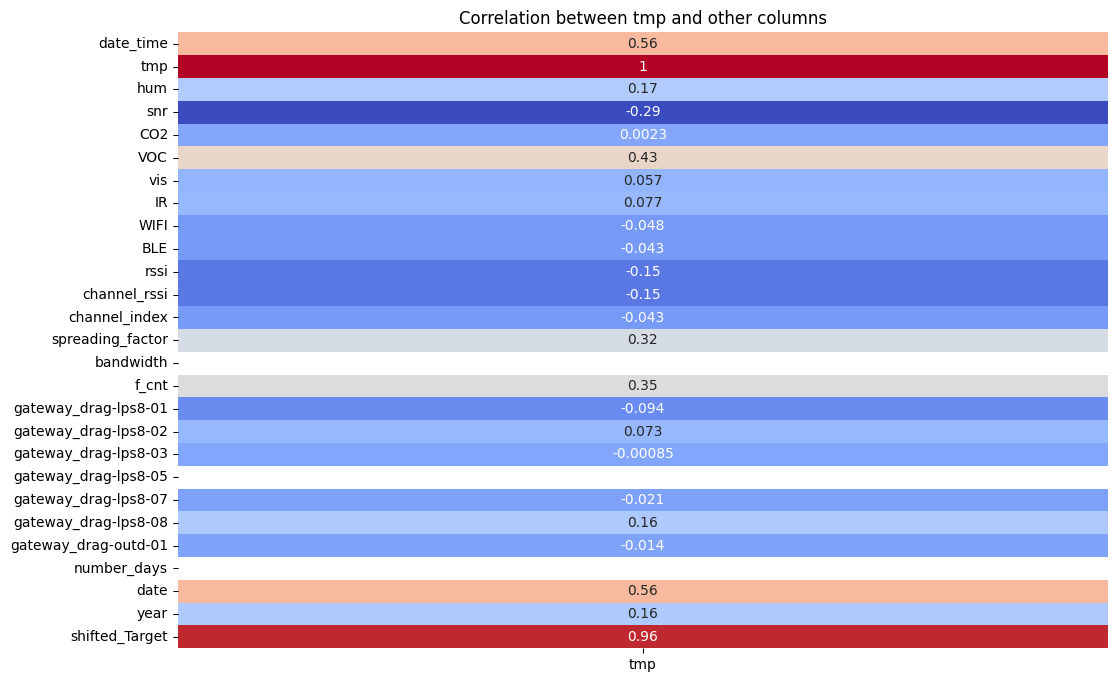

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.drop("device_id",axis=1).corr()['tmp']
plt.figure(figsize=(12, 8))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation between tmp and other columns')
plt.show()